In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import requests
import time
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from scipy.stats import linregress

fig = plt.figure()



<Figure size 432x288 with 0 Axes>

In [11]:
data_df = pd.read_csv("Output/CleanedSpeed.csv")
data_df["Race"].replace({1: "Black/African American", 2: "European/Caucasion-American", 3: "Latino/Hispanic American", 4: "Asian/Pacific Islander/Asian-American", 5: "Native American", 6: "Other"},inplace=True)
data_df["Gender"].replace({0: "Female", 1: "Male"}, inplace=True)
data_df.head()

,Unique ID,Gender,Wave,Match,Same Race,Age of Partner,Race of Partner,Partner Preference Attractive,Partner Preference Sincere,Partner Preference Intelligence,...,Own Rating Ambition,Decision,Estimation of Matches,Number of Dates,Your Preference Attractive Post-Date,Your Preference Sincere Post-Date,Your Preference Intelligence Post-Date,Your Preference Fun Post-Date,Your Preference Ambition Post-Date,Your Preference Shared Interests Post-Date
0,1,Female,1,0,0,27.0,2.0,35.0,20.0,20.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
1,1,Female,1,0,0,22.0,2.0,60.0,0.0,0.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
2,1,Female,1,1,1,22.0,4.0,19.0,18.0,19.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
3,1,Female,1,1,0,23.0,2.0,30.0,5.0,15.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
4,1,Female,1,1,0,24.0,3.0,30.0,10.0,20.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0


 'groupby unique id',  
 'Own Rating Attractive',
 'Own Rating Sincere',
 'Own Rating Fun',
 'Own Rating Intelligence',
 'Own Rating Ambition',
 'Partner Rating Attractive',
 'Partner Rating Sincere',
 'Partner Rating Intelligence',
 'Partner Rating Fun',
 'Partner Rating Ambition',
 'Partner Rating Shared Interests'


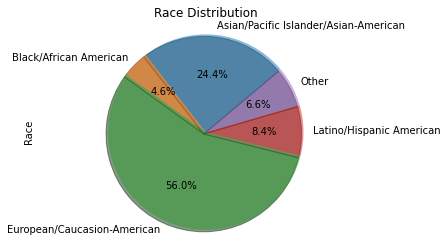

In [10]:
#create a race groupby dataframe for this plot to the get the race distribution in the dataset.
race_df = data_df.groupby('Race')
race_ct_df = pd.DataFrame(race_df['Race'].count())
race_ct_df.plot(kind='pie',y='Race', title= 'Race Distribution', startangle=40,  
               shadow = True, autopct="%1.1f%%", legend=False, wedgeprops={'alpha':0.5})
fig.patch.set_facecolor("white")
plt.savefig('Output/Race.png')
plt.axis('equal')
plt.show()

Majority is European/Caucasian-American(56%). Asian/Pacific Islander-American are second(24.4%), while Latin/Hispanic-American(8.4%), Black/African-American(4.6%), and "Other"(6.6%) each make up less than 10% respectively. 

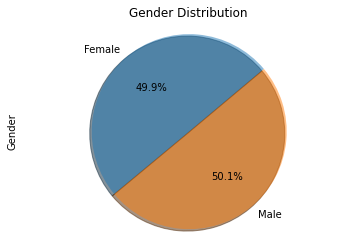

In [9]:
gender_df = data_df.groupby('Gender')

gender_ct_df = pd.DataFrame(gender_df['Gender'].count())
gender_ct_df.plot(kind='pie',y='Gender', title= 'Gender Distribution', startangle=40,  
               shadow = True, autopct="%1.1f%%", legend=False, wedgeprops={'alpha':0.5})
fig.patch.set_facecolor("white")
plt.savefig('Output/Gender.png')
plt.axis('equal')

#plt.savefig('pie_pandas.png', bbox_inches='tight')
plt.show()

Males and Females are close to even representation in this dataset (49.9% and 50.1% respectively).

In [22]:
your_gender_pref = data_df[['Gender','Your Preference Attractive','Your Preference Sincere','Your Preference Intelligence','Your Preference Fun','Your Preference Ambition','Your Preference Shared Interests']].groupby('Gender').mean()
cols = ['Attractive','Sincerity','Intelligence','Fun','Ambition','Shared Interests']
your_gender_pref.columns = cols
your_gender_pref

,Attractive,Sincerity,Intelligence,Fun,Ambition,Shared Interests
Gender,,,,,,
0,18.788883,18.377089,21.568459,17.043556,12.005635,12.264193
1,29.108895,16.233127,19.564615,17.657753,7.498773,10.258607


In [25]:
males = go.Bar(y=list(your_gender_pref.iloc[1]), x=your_gender_pref.columns.values, name='Men', marker=dict(color='green'))
females = go.Bar(y=list(your_gender_pref.iloc[0]), x=your_gender_pref.columns.values, name='Women', marker=dict(color='orange'))

data1 = [males, females]
layout = go.Layout(title='Pre-Speed-Dating Preference in the Opposite Sex',font=dict(size=16),legend=dict(font=dict(size=16)))
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='barchart')

Pre-speed-dating Men value attractiveness above all other traits while Women value Intelligence the most. Both men and women value ambition the least.

In [26]:
opposite_pref = data_df[['Gender','Opposite-Sex Preference Attractive','Opposite-Sex Preference Sincere','Opposite-Sex Preference Intelligence','Opposite-Sex Preference Fun','Opposite-Sex Preference Ambition','Opposite-Sex Preference Shared Interests']].groupby('Gender').mean()
cols = ['Attractive','Sincerity','Intelligence','Fun','Ambition','Shared Interests']
opposite_pref.columns = cols
opposite_pref

,Attractive,Sincerity,Intelligence,Fun,Ambition,Shared Interests
Gender,,,,,,
0,38.862048,10.416841,12.008659,18.591520,8.303673,12.037623
1,27.041556,14.746832,16.148541,18.111111,13.718002,10.198345


In [27]:
males = go.Bar(y=list(opposite_pref.iloc[1]), x=opposite_pref.columns.values, name='Men', marker=dict(color='green'))
females = go.Bar(y=list(opposite_pref.iloc[0]), x=opposite_pref.columns.values, name='Women', marker=dict(color='orange'))

data1 = [males, females]
layout = go.Layout(title='What men and women think the opposite sex are looking for',font=dict(size=16),legend=dict(font=dict(size=16)))
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='barchart')


Women think men value attractiveness above all else. Men think the same of women, but less. Men think women value ambition more than they do in the pre-speed-dating bar chart.

In [28]:
post_date_pref_df = data_df[['Gender','Your Preference Attractive Post-Date',
                        'Your Preference Sincere Post-Date','Your Preference Intelligence Post-Date',
                        'Your Preference Fun Post-Date','Your Preference Ambition Post-Date',
                        'Your Preference Shared Interests Post-Date']].groupby('Gender').mean()
cols = ['Attractive','Sincerity','Intelligence','Fun','Ambition','Shared Interests']
post_date_pref_df.columns = cols
post_date_pref_df

,Attractive,Sincerity,Intelligence,Fun,Ambition,Shared Interests
Gender,,,,,,
0,22.266824,17.240850,20.096812,15.563164,11.081464,13.792208
1,32.462977,15.074794,19.281227,16.532536,7.398654,9.833209


In [30]:
males = go.Bar(y=list(post_date_pref_df.iloc[1]), x=post_date_pref_df.columns.values, name='Men', marker=dict(color='green'))
females = go.Bar(y=list(post_date_pref_df.iloc[0]), x=post_date_pref_df.columns.values, name='Women', marker=dict(color='orange'))

data1 = [males, females]
layout = go.Layout(title='Post-Date Preference in the Opposite Sex',font=dict(size=16),legend=dict(font=dict(size=16)))
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='barchart')


Post-speed-dating Men and Women prefer attractiveness more than pre-speed-dating. Both still prefer ambition the least of the attributes.